**Vishv Patel**

**Student Number :** 8977662

## Lab 5 - Multivariate Regression, Non-Parametric Models and Cross-Validation

### Frame the Problem : 
Explore Multivariate Regression Using Polynomial, Decision Trees and kNN, to optimize a model for predicting diabetes disease progression. 

Importing the Liraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 1. Utilize the diabetes dataset.

In [2]:
# import Dataset
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

### 2. EDA exploration.

In [4]:
# Showing statistics by describing dataset
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = y # Target

# 1. Basic Statistics
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


__Attribute Information:__
- age = age in years
- sex
- bmi = body mass index
- bp = average blood pressure
- s1 tc = total serum cholesterol
- s2 ldl = low-density lipoproteins
- s3 hdl = high-density lipoproteins
- s4 tch = total cholesterol / HDL
- s5 ltg = possibly log of serum triglycerides level
- s6 glu = blood sugar level

In [5]:
# Display the first five rows of the dataset
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [80]:
# Checking for missing values
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

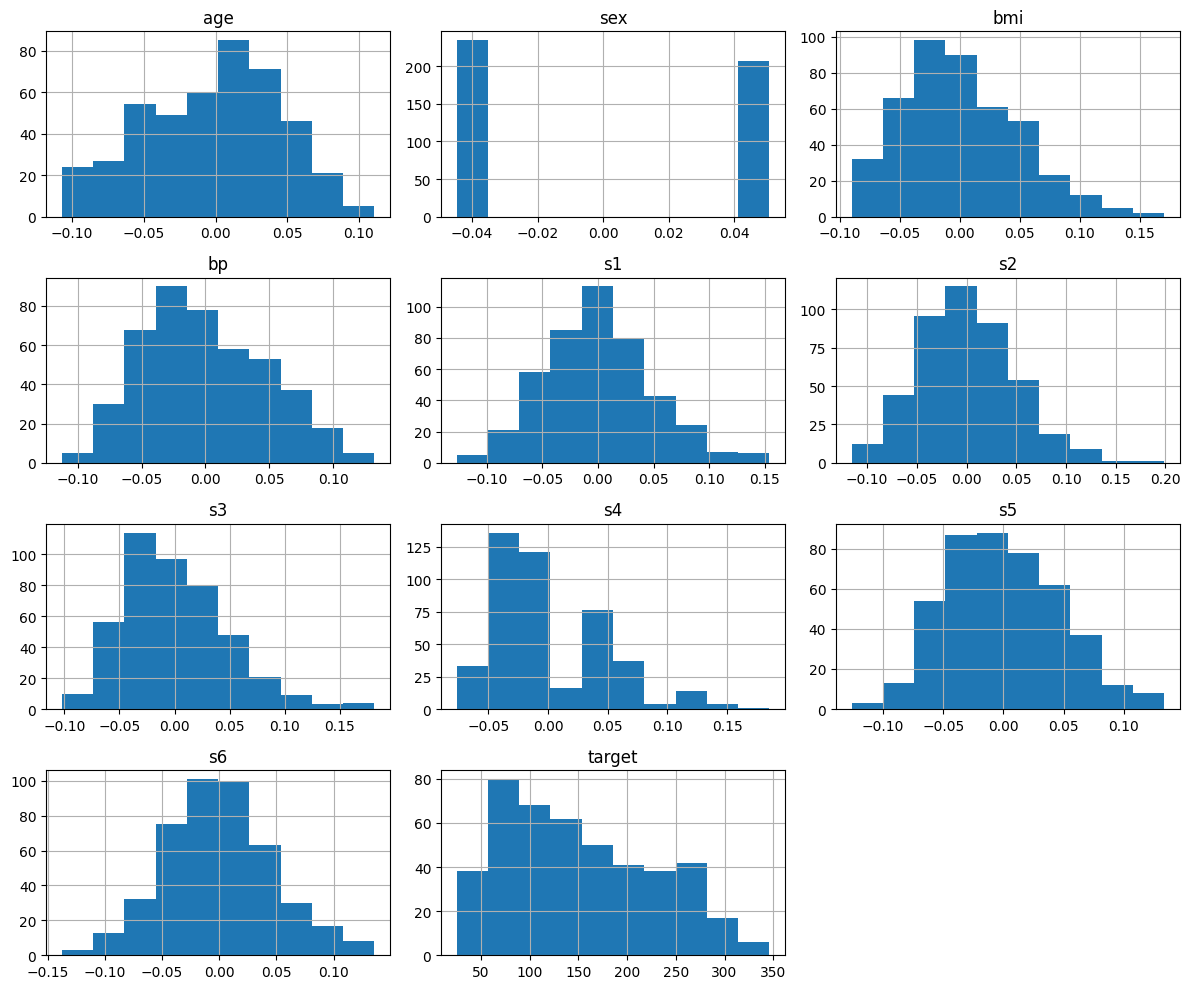

In [6]:
# Visualizing the distribution of each feature using histograms
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

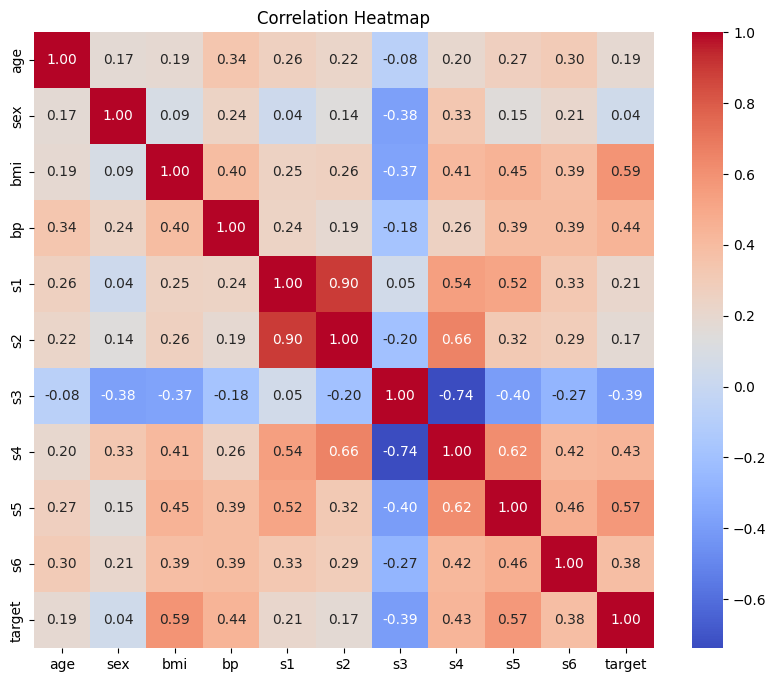

In [7]:
# Correlation heatmap
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

A correlation matrix is a table that shows the correlation coefficients between variables in a dataset. Each cell in the table represents the correlation between two variables. The correlation coefficient quantifies the strength and direction of the relationship between two variables.

Range of values: Correlation coefficients range from -1 to 1.

1. A correlation coefficient of 1 indicates a perfect positive correlation, meaning that as one variable increases, the other variable also increases proportionally.
2. A correlation coefficient of -1 indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases proportionally.
3. A correlation coefficient of 0 indicates no linear correlation between the variables.

* Based on Correlation matrix we can neglect some features like s1, s2, and s3 from the dataset, and other feature somewhat corelated with out target.

### 3. Going forward, you can use all features in the dataset, or drop some features per your discretion based on the EDA.

In [8]:
# drop s1, s2, s3 columns as they don't have significant relationship with target as per shown in correlation Matrix.
columns_to_drop = ['target', 's1', 's2', 's3']
df.drop(columns_to_drop, axis=1)


,age,sex,bmi,bp,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.026560,0.044529,-0.025930


### 4. Set a test-set aside.

In [9]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 5. Perform cross-validation. consider using the cross_validate function as it provides a list of scoring functions as an input. This should be on:

A. At least two polynomial models (degrees >=0, of your choice)<br>
B. At least two decision trees (e.g. consider changing the `max_depth` hyperparameter)<br>
C. At least two kNNs

In [10]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_absolute_error

# Define models
models = {
    'Polynomial Regression (degree=2)': make_pipeline(PolynomialFeatures(degree=1), LinearRegression()),
    'Polynomial Regression (degree=3)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Decision Tree (max_depth=2)': DecisionTreeRegressor(max_depth=2),
    'Decision Tree (max_depth=5)': DecisionTreeRegressor(max_depth=3),
    'KNN (k=3)': KNeighborsRegressor(n_neighbors=3),
    'KNN (k=5)': KNeighborsRegressor(n_neighbors=5)
}

### 6. Construct a table summarizing the cross-validation results. Use 5 folds. Each model should have a separate row in the table. Have the mean and standard deviation for each model (calculated per model over all 5 folds)
A. R-Squared <br>
B. Mean Absolute Error (MAE) <br>
C. MAPE <br>

In [11]:
results = {}
for name, model in models.items():  # Use items() method to iterate over keys and values
    cv_scores = cross_validate(model, X_train, y_train, scoring=('r2', 'neg_mean_absolute_error'), cv=5)
    mape_scores = np.abs((cv_scores['test_neg_mean_absolute_error'] / y_train.mean()) * 100)
    results[name] = {
        'Mean R-squared': cv_scores['test_r2'].mean(),
        'Mean MAE': -cv_scores['test_neg_mean_absolute_error'].mean(),
        'Mean MAPE': mape_scores.mean(),
        'Std R-squared': cv_scores['test_r2'].std(),
        'Std MAE': -cv_scores['test_neg_mean_absolute_error'].std(),
        'Std MAPE': mape_scores.std()
    }

# Create a table summarizing the cross-validation results
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df


,Mean R-squared,Mean MAE,Mean MAPE,Std R-squared,Std MAE,Std MAPE
Polynomial Regression (degree=2),0.449256,45.543329,29.624270,0.144095,-3.114136,2.025632
Polynomial Regression (degree=3),-0.597413,70.259727,45.701383,1.735971,-37.194801,24.193858
Decision Tree (max_depth=2),0.351609,49.712153,32.335938,0.124636,-4.026347,2.618992
Decision Tree (max_depth=5),0.273634,52.144310,33.917967,0.153972,-3.509058,2.282514
KNN (k=3),0.242040,52.352770,34.053562,0.109146,-2.657486,1.728598
KNN (k=5),0.317221,50.199461,32.652914,0.104040,-2.613718,1.700128


### 7. Identify the best model.

##### A. Run the model on the test set and provide results (R-Squared, MAPE, MAE) 

In [13]:
# Find the model with the highest mean R-squared
best_r_squared_model = results_df['Mean R-squared'].idxmax()

# Find the model with the lowest mean MAE
best_mae_model = results_df['Mean MAE'].idxmin()

# Find the model with the lowest mean MAPE
best_mape_model = results_df['Mean MAPE'].idxmin()

print("Best model based on Mean R-squared:", best_r_squared_model)
print("Best model based on Mean MAE:", best_mae_model)
print("Best model based on Mean MAPE:", best_mape_model)


Best model based on Mean R-squared: Polynomial Regression (degree=2)
Best model based on Mean MAE: Polynomial Regression (degree=2)
Best model based on Mean MAPE: Polynomial Regression (degree=2)


In [14]:
# Fit the best model on the entire training data
best_model_name = 'Polynomial Regression (degree=2)'  # Use the name of the model as the key
best_model = models[best_model_name]

# Evaluate on test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"R-squared on test set: {r2}")
print(f"MAE on test set: {mae}")
print(f"MAPE on test set: {mape}")

R-squared on test set: 0.45260276297191937
MAE on test set: 42.794094679599944
MAPE on test set: 0.3749982636756113


##### B. Plot a graph with the datapoints (train+validation and test), and the fitted model

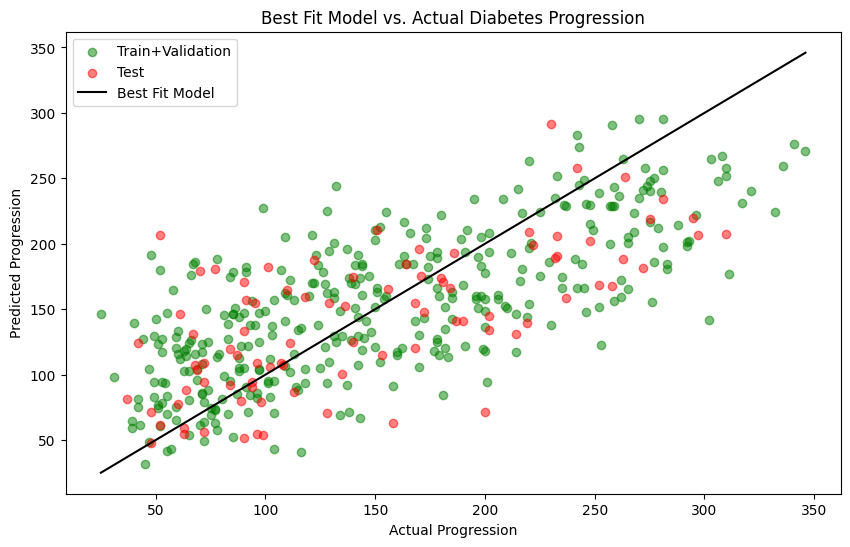

In [15]:
# Plotting the fitted model
plt.figure(figsize=(10, 6))
plt.scatter(y_train, best_model.predict(X_train), label='Train+Validation', color='green', alpha=0.5)
plt.scatter(y_test, y_pred, label='Test', color='red', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', label='Best Fit Model')
plt.xlabel('Actual Progression')
plt.ylabel('Predicted Progression')
plt.title('Best Fit Model vs. Actual Diabetes Progression')
plt.legend()
plt.show()

### 8. Provide a conclusion section. In particular, do a deep dive on where the model fails, and add a short section in the conclusions that describes the model limitations. This should be in addition to summarizing it performance.

The **polynomial regression model with degree=2** exhibits moderate performance on the test set, with an **R-squared value of approximately 0.45**, indicating that around 45% of the variance in the target variable is explained by the model. **The Mean Absolute Error (MAE) on the test set is approximately 42.79**, and **the Mean Absolute Percentage Error (MAPE) is around 0.375%**.

**Model Limitations:**

1. Underfitting or oversimplified model: The model may fail to capture complex relationships in the data, resulting in underfitting. <br>
2. Limited predictive power: Despite its performance, a significant portion of the variance remains unexplained, suggesting the presence of unaccounted factors. <br>
3. Sensitivity to outliers: Outliers can significantly impact the model's coefficients and predictions, affecting its generalization. 

**Model Failures:**

1. Nonlinear Relationships: The model struggles with nonlinear relationships between predictors and the target variable.
2. Outliers: Outliers distort the regression line and affect predictions, particularly in regions with high outlier density.
3. Complex Interactions: Complex interactions between predictors are not adequately captured, leading to biased estimates.

In summary, while the polynomial regression model offers insights, its limitations underscore the need for more sophisticated modeling approaches and careful consideration of data characteristics to improve predictive accuracy.